In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [10]:
data = pd.DataFrame(datasets.fetch_california_housing(as_frame=True)['data'])
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
import scipy.cluster.hierarchy as clu
from sklearn.cluster import AgglomerativeClustering

In [4]:
X = data.sample(100).iloc[0:100, 1:3]

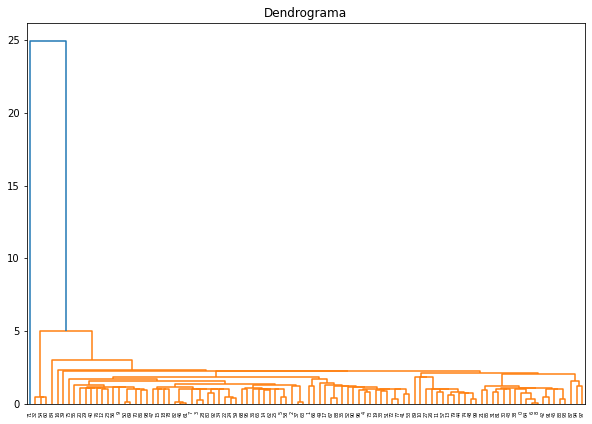

In [5]:
plt.figure(figsize=(10,7))
plt.title('Dendrograma')
dend = clu.dendrogram(clu.linkage(X.values))

In [6]:
modelo = AgglomerativeClustering(n_clusters=3)

# Ajustamos el modelo a los datos
labels = modelo.fit_predict(X)

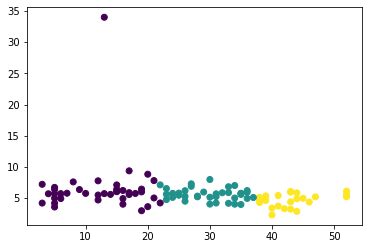

In [7]:
plt.scatter(X.values[:,0], X.values[:,1], c=labels)
plt.show()

## K means clustering

In [8]:
from sklearn.cluster import KMeans

In [12]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

In [ ]:
# Graficamos la inercia en función de k
plt.plot(range(1, 11), inertias)
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

In [ ]:
# Elegimos el número de clusters óptimo
elbow = np.argmax(np.diff(inertias)) + 1
print("El número de clusters óptimo es:", elbow)

In [ ]:
# Ajustamos el modelo con el número de clusters óptimo
kmeans = KMeans(n_clusters=elbow)
kmeans.fit(data)

In [ ]:
# Visualizamos los clusters
labels = kmeans.labels_
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.show()